# 1- Definning Problem

### A cofe shop is suffering from daily (1- Out of stock 2-Over Stock), which cosig increasing in wastage cost and decreasing in profit so I decided to help them by building a Daily demand forecasting for their products consumption 

# 2- Collecting Data

### The data has been collected from their POS system 
### using Octoparse web scraping tool I collected the data for daily customers bills (recipetes) which results in almost 100k bills

# 3- Preapring Data

In [1]:
# Reading Data
import pandas as pd
df = pd.read_csv("Sales 2023.csv", low_memory=False)

In [2]:
df

,Date,Receipt number,Receipt type,Category,SKU,Item,Variant,Modifiers applied,Quantity,Gross sales,...,Gross profit,Taxes,Dining option,POS,Store,Cashier name,Customer name,Customer contacts,Comment,Status
0,01/01/2024 23:54,4-63916,Sale,قهوة,10013,قهوة اليوم (بارد),كبير,NaN,1.0,12.0,...,8.94,1.57,Dine in,آسن! - الفرع الثاني,آســـن!Assin - فرع الدائري,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
1,01/01/2024 23:54,4-63916,Sale,مشاريب,10011,بروتي,NaN,NaN,1.0,20.0,...,14.43,2.60,Dine in,آسن! - الفرع الثاني,آســـن!Assin - فرع الدائري,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
2,01/01/2024 23:49,4-63915,Sale,قهوة,10019,مكياتو,NaN,NaN,1.0,15.0,...,12.87,1.96,Dine in,آسن! - الفرع الثاني,آســـن!Assin - فرع الدائري,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
3,01/01/2024 23:44,4-63914,Sale,قهوة,10007,قهوة اليوم (بارد),صغير,NaN,2.0,20.0,...,14.94,2.61,Dine in,آسن! - الفرع الثاني,آســـن!Assin - فرع الدائري,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
4,01/01/2024 23:43,4-63913,Sale,قهوة,10013,قهوة اليوم (بارد),كبير,NaN,1.0,12.0,...,8.94,1.57,Dine in,آسن! - الفرع الثاني,آســـن!Assin - فرع الدائري,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95212,01/01/2023 07:17,1-12290,Sale,قهوة,10009,قهوة اليوم (حار),صغير,NaN,1.0,10.0,...,7.00,0.00,NaN,آسن! - الفرع الأول,آســـن!Assin - فرع الجرف,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
95213,01/01/2023 07:16,1-12289,Sale,قهوة,10013,قهوة اليوم (بارد),كبير,NaN,1.0,11.0,...,8.00,0.00,NaN,آسن! - الفرع الأول,آســـن!Assin - فرع الجرف,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
95214,01/01/2023 00:27,1-12288,Sale,حلا,10002,اكلير,NaN,NaN,1.0,12.0,...,7.50,0.00,NaN,آسن! - الفرع الأول,آســـن!Assin - فرع الجرف,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed
95215,01/01/2023 00:21,1-12287,Sale,مشاريب,10005,شاي مثلج - توت ورمان,NaN,NaN,1.0,15.0,...,11.50,0.00,NaN,آسن! - الفرع الأول,آســـن!Assin - فرع الجرف,a_nasef94@hotmail.com,NaN,NaN,NaN,Closed


In [3]:
# Dropping unused columns since we are focusing on demand forecasting
df = df.drop(["Receipt type", "SKU","Modifiers applied","Discounts","Taxes","Dining option", "POS","Store","Gross sales", "Cashier name" , "Customer name", "Customer contacts", "Comment", "Status"], axis=1)

In [4]:
df

,Date,Receipt number,Category,Item,Variant,Quantity,Net sales,Cost of goods,Gross profit
0,01/01/2024 23:54,4-63916,قهوة,قهوة اليوم (بارد),كبير,1.0,12.0,3.06,8.94
1,01/01/2024 23:54,4-63916,مشاريب,بروتي,NaN,1.0,20.0,5.57,14.43
2,01/01/2024 23:49,4-63915,قهوة,مكياتو,NaN,1.0,15.0,2.13,12.87
3,01/01/2024 23:44,4-63914,قهوة,قهوة اليوم (بارد),صغير,2.0,20.0,5.06,14.94
4,01/01/2024 23:43,4-63913,قهوة,قهوة اليوم (بارد),كبير,1.0,12.0,3.06,8.94
...,...,...,...,...,...,...,...,...,...
95212,01/01/2023 07:17,1-12290,قهوة,قهوة اليوم (حار),صغير,1.0,10.0,3.00,7.00
95213,01/01/2023 07:16,1-12289,قهوة,قهوة اليوم (بارد),كبير,1.0,11.0,3.00,8.00
95214,01/01/2023 00:27,1-12288,حلا,اكلير,NaN,1.0,12.0,4.50,7.50
95215,01/01/2023 00:21,1-12287,مشاريب,شاي مثلج - توت ورمان,NaN,1.0,15.0,3.50,11.50


In [5]:
# Explore Columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95217 entries, 0 to 95216
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            95217 non-null  object 
 1   Receipt number  95217 non-null  object 
 2   Category        94969 non-null  object 
 3   Item            95217 non-null  object 
 4   Variant         47000 non-null  object 
 5   Quantity        95217 non-null  float64
 6   Net sales       95217 non-null  float64
 7   Cost of goods   95217 non-null  float64
 8   Gross profit    95217 non-null  float64
dtypes: float64(4), object(5)
memory usage: 6.5+ MB


In [6]:
# Conver Date column into datetime format insted of object so we could handle it correclty and pefrom Datetime related tasks
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M', dayfirst=True, errors='coerce')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95217 entries, 0 to 95216
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            95217 non-null  datetime64[ns]
 1   Receipt number  95217 non-null  object        
 2   Category        94969 non-null  object        
 3   Item            95217 non-null  object        
 4   Variant         47000 non-null  object        
 5   Quantity        95217 non-null  float64       
 6   Net sales       95217 non-null  float64       
 7   Cost of goods   95217 non-null  float64       
 8   Gross profit    95217 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 6.5+ MB


In [8]:
# Sort Values by date
df.sort_values("Date")

,Date,Receipt number,Category,Item,Variant,Quantity,Net sales,Cost of goods,Gross profit
95216,2023-01-01 00:21:00,1-12287,مشاريب,كرك,10 / 8,1.0,8.0,0.00,8.00
95215,2023-01-01 00:21:00,1-12287,مشاريب,شاي مثلج - توت ورمان,NaN,1.0,15.0,3.50,11.50
95214,2023-01-01 00:27:00,1-12288,حلا,اكلير,NaN,1.0,12.0,4.50,7.50
95213,2023-01-01 07:16:00,1-12289,قهوة,قهوة اليوم (بارد),كبير,1.0,11.0,3.00,8.00
95212,2023-01-01 07:17:00,1-12290,قهوة,قهوة اليوم (حار),صغير,1.0,10.0,3.00,7.00
...,...,...,...,...,...,...,...,...,...
4,2024-01-01 23:43:00,4-63913,قهوة,قهوة اليوم (بارد),كبير,1.0,12.0,3.06,8.94
3,2024-01-01 23:44:00,4-63914,قهوة,قهوة اليوم (بارد),صغير,2.0,20.0,5.06,14.94
2,2024-01-01 23:49:00,4-63915,قهوة,مكياتو,NaN,1.0,15.0,2.13,12.87
1,2024-01-01 23:54:00,4-63916,مشاريب,بروتي,NaN,1.0,20.0,5.57,14.43


### Now the data is ready for Processing (Cleaning , Manipulation, Formating)

# 4- Data Processing

In [9]:
# Check Duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows


,Date,Receipt number,Category,Item,Variant,Quantity,Net sales,Cost of goods,Gross profit
1733,2023-12-28 00:22:00,4-62609,حلا,طورطة منقا,NaN,1.0,20.0,0.00,20.00
2510,2023-12-25 20:17:00,4-62003,قهوة,قهوة اليوم (بارد),صغير,1.0,10.0,2.53,7.47
2813,2023-12-24 20:18:00,4-61764,قهوة,قهوة اليوم (بارد),كبير,1.0,12.0,3.06,8.94
3629,2023-12-21 21:49:00,4-61133,مشاريب,بروتي,NaN,1.0,20.0,5.57,14.43
4554,2023-12-18 14:42:00,4-60415,حجم عائلي,شاي مثلج النخبة,NaN,1.0,50.0,12.52,37.48
...,...,...,...,...,...,...,...,...,...
91224,2023-02-18 01:27:00,1-15450,قهوة,قهوة اليوم (حار),صغير,1.0,5.0,3.00,2.00
91225,2023-02-18 01:27:00,1-15450,مشاريب,شاي مثلج - توت ورمان,NaN,1.0,7.5,3.50,4.00
92439,2023-02-04 17:16:00,1-14491,مشاريب,كاسكارا,NaN,1.0,20.0,2.50,17.50
94001,2023-01-15 23:07:00,1-13230,مشاريب,كرك,10 / 8,1.0,8.0,0.00,8.00


In [10]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 142


In [11]:
# Drop duplicates
df = df.drop_duplicates()

In [12]:
# Check after removing Duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Check Nulls

In [13]:
# Check Nulls
print(df.isnull().sum())


Date                  0
Receipt number        0
Category            246
Item                  0
Variant           48113
Quantity              0
Net sales             0
Cost of goods         0
Gross profit          0
dtype: int64


The nulss attend in (Category and Variant Column)
Since We are data scientist we cant just drop them or filling them without understading the situation

### 1- The category column: We need to check the nubmer of recipetes associated with null catehory, to get insights about how big our problem is 


In [14]:
column_name = 'Category' 
null_count = df[column_name].isnull().sum()
print(f"Number of rows with null values in {column_name}: {null_count}")

total_number =(null_count / len(df))
total_number = "{:.2f}%".format(total_number * 100)
print(f"The Percentage {total_number}" )

Number of rows with null values in Category: 246
The Percentage 0.26%


As we can we its very small percentage we have 2 options Now (1- Delete Rows 2- Fill the category with Unknown or others cause eventually it doesnt have direct impactx on the product demand forecsting)

In [15]:
df['Category'].fillna('Unknown', inplace=True)

C:\Users\nasef\AppData\Local\Temp\ipykernel_23748\1912591924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'].fillna('Unknown', inplace=True)


In [16]:
# AAfter Cleaning
column_name = 'Category' 
null_count = df[column_name].isnull().sum()
print(f"Number of rows with null values in {column_name}: {null_count}")

total_number =(null_count / len(df))
total_number = "{:.2f}%".format(total_number * 100)
print(f"The Percentage {total_number}" )

Number of rows with null values in Category: 0
The Percentage 0.00%


### 2- The Variation Column: this column Is very important cause its have direct impact on the forecasting cause its indicates product variation (Small, large)

In [17]:
column_name = 'Variant' 
null_count = df[column_name].isnull().sum()
print(f"Number of rows with null values in {column_name}: {null_count}")

total_number =(null_count / len(df))
total_number = "{:.2f}%".format(total_number * 100)
print(f"The Percentage {total_number}" )

Number of rows with null values in Variant: 48113
The Percentage 50.61%


Its Very large amount now we must fill it with something insightful or we can combine non-null value with the Item column and null vlaues doesnt matter cause the item doesnt have variation

In [18]:
import pandas as pd
import numpy as np

# Sample function to combine 'Item' and 'Variant' columns
def combine_item_variant(row):
    if pd.isna(row['Variant']):
        return row['Item']
    else:
        return f"{row['Item']} ({row['Variant']})"

# Apply the function to each row in the DataFrame
df['Item'] = df.apply(combine_item_variant, axis=1)

# Drop Variant Column
df = df.drop(["Variant"], axis=1)

# Display the updated DataFrame
df


C:\Users\nasef\AppData\Local\Temp\ipykernel_23748\3167747852.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item'] = df.apply(combine_item_variant, axis=1)


,Date,Receipt number,Category,Item,Quantity,Net sales,Cost of goods,Gross profit
0,2024-01-01 23:54:00,4-63916,قهوة,قهوة اليوم (بارد) (كبير),1.0,12.0,3.06,8.94
1,2024-01-01 23:54:00,4-63916,مشاريب,بروتي,1.0,20.0,5.57,14.43
2,2024-01-01 23:49:00,4-63915,قهوة,مكياتو,1.0,15.0,2.13,12.87
3,2024-01-01 23:44:00,4-63914,قهوة,قهوة اليوم (بارد) (صغير),2.0,20.0,5.06,14.94
4,2024-01-01 23:43:00,4-63913,قهوة,قهوة اليوم (بارد) (كبير),1.0,12.0,3.06,8.94
...,...,...,...,...,...,...,...,...
95212,2023-01-01 07:17:00,1-12290,قهوة,قهوة اليوم (حار) (صغير),1.0,10.0,3.00,7.00
95213,2023-01-01 07:16:00,1-12289,قهوة,قهوة اليوم (بارد) (كبير),1.0,11.0,3.00,8.00
95214,2023-01-01 00:27:00,1-12288,حلا,اكلير,1.0,12.0,4.50,7.50
95215,2023-01-01 00:21:00,1-12287,مشاريب,شاي مثلج - توت ورمان,1.0,15.0,3.50,11.50


In [19]:
# Check Nulls after cleaning
# Check Nulls
print(df.isnull().sum())


Date              0
Receipt number    0
Category          0
Item              0
Quantity          0
Net sales         0
Cost of goods     0
Gross profit      0
dtype: int64


## Feature Engineering

In [20]:
df

,Date,Receipt number,Category,Item,Quantity,Net sales,Cost of goods,Gross profit
0,2024-01-01 23:54:00,4-63916,قهوة,قهوة اليوم (بارد) (كبير),1.0,12.0,3.06,8.94
1,2024-01-01 23:54:00,4-63916,مشاريب,بروتي,1.0,20.0,5.57,14.43
2,2024-01-01 23:49:00,4-63915,قهوة,مكياتو,1.0,15.0,2.13,12.87
3,2024-01-01 23:44:00,4-63914,قهوة,قهوة اليوم (بارد) (صغير),2.0,20.0,5.06,14.94
4,2024-01-01 23:43:00,4-63913,قهوة,قهوة اليوم (بارد) (كبير),1.0,12.0,3.06,8.94
...,...,...,...,...,...,...,...,...
95212,2023-01-01 07:17:00,1-12290,قهوة,قهوة اليوم (حار) (صغير),1.0,10.0,3.00,7.00
95213,2023-01-01 07:16:00,1-12289,قهوة,قهوة اليوم (بارد) (كبير),1.0,11.0,3.00,8.00
95214,2023-01-01 00:27:00,1-12288,حلا,اكلير,1.0,12.0,4.50,7.50
95215,2023-01-01 00:21:00,1-12287,مشاريب,شاي مثلج - توت ورمان,1.0,15.0,3.50,11.50


In [21]:
# I notices there are data from the first day of 2024 we need to remove it to give all months equal contribution and focus on 2023 yea only 
df = df[df['Date'].dt.year != 2024]
df


,Date,Receipt number,Category,Item,Quantity,Net sales,Cost of goods,Gross profit
363,2023-12-31 23:53:00,4-63634,قهوة,قهوة اليوم (بارد) (صغير),1.0,10.0,2.53,7.47
364,2023-12-31 23:53:00,4-63634,قهوة,قهوة اليوم (بارد) (كبير),1.0,12.0,3.06,8.94
365,2023-12-31 23:36:00,4-63633,مشاريب,شاي مثلج - توت ورمان,2.0,30.0,6.60,23.40
366,2023-12-31 23:33:00,4-63632,قهوة,قهوة اليوم (بارد) (صغير),1.0,10.0,2.53,7.47
367,2023-12-31 23:31:00,4-63631,حلا,شوكولاته مقرمشه,2.0,30.0,11.00,19.00
...,...,...,...,...,...,...,...,...
95212,2023-01-01 07:17:00,1-12290,قهوة,قهوة اليوم (حار) (صغير),1.0,10.0,3.00,7.00
95213,2023-01-01 07:16:00,1-12289,قهوة,قهوة اليوم (بارد) (كبير),1.0,11.0,3.00,8.00
95214,2023-01-01 00:27:00,1-12288,حلا,اكلير,1.0,12.0,4.50,7.50
95215,2023-01-01 00:21:00,1-12287,مشاريب,شاي مثلج - توت ورمان,1.0,15.0,3.50,11.50


In [22]:
# Extract date only (remove time)
#df['Date'] = df['Date'].dt.date

# Group by 'Date' and 'Item', summing the 'Quantity'
daily_sales = df.groupby([df['Date'].dt.date, 'Item'])[['Quantity',"Net sales","Cost of goods","Gross profit"]].sum().reset_index()

# Set 'Date' as the index
daily_sales.set_index('Date', inplace=True)

# Display the resulting DataFrame
daily_sales

,Item,Quantity,Net sales,Cost of goods,Gross profit
Date,,,,,
2023-01-01,اكلير,13.0,156.0,58.50,97.50
2023-01-01,بن اثيوبي 150 قرام,1.0,60.0,40.00,20.00
2023-01-01,شاي مثلج - توت ورمان,41.0,609.0,143.50,465.50
2023-01-01,شوكولاته مقرمشه,5.0,58.2,17.50,40.70
2023-01-01,قهوة اليوم (بارد) (صغير),5.0,45.0,13.00,32.00
...,...,...,...,...,...
2023-12-31,كورتادو,2.0,30.0,8.26,21.74
2023-12-31,كولد برو,6.0,120.0,36.84,83.16
2023-12-31,لاتيه,3.0,45.0,12.99,32.01


In [23]:
#Adding the category since its might be an important feature duringbuilding the forecasting model 

import pandas as pd

df_sales = daily_sales
df_categories = df

# Create a mapping from the category DataFrame
category_mapping = pd.Series(df_categories.Category.values, index=df_categories.Item).to_dict()

# Map the categories to the sales DataFrame
df_sales['Category'] = df_sales['Item'].map(category_mapping)

# Display the resulting DataFrame
df_sales


,Item,Quantity,Net sales,Cost of goods,Gross profit,Category
Date,,,,,,
2023-01-01,اكلير,13.0,156.0,58.50,97.50,حلا
2023-01-01,بن اثيوبي 150 قرام,1.0,60.0,40.00,20.00,بن
2023-01-01,شاي مثلج - توت ورمان,41.0,609.0,143.50,465.50,مشاريب
2023-01-01,شوكولاته مقرمشه,5.0,58.2,17.50,40.70,حلا
2023-01-01,قهوة اليوم (بارد) (صغير),5.0,45.0,13.00,32.00,قهوة
...,...,...,...,...,...,...
2023-12-31,كورتادو,2.0,30.0,8.26,21.74,قهوة
2023-12-31,كولد برو,6.0,120.0,36.84,83.16,مشاريب
2023-12-31,لاتيه,3.0,45.0,12.99,32.01,قهوة


In [24]:
df = df_sales.reset_index()

In [25]:
df["Date"] = pd.to_datetime(df["Date"])

In [26]:
# Add Date Time columns since its crusial for forecasting
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Date'].dt.dayofweek.apply(lambda x: 1 if x in [3, 4] else 0)



In [27]:
df

,Date,Item,Quantity,Net sales,Cost of goods,Gross profit,Category,Year,Month,Day,WeekDay,Is_Weekend
0,2023-01-01,اكلير,13.0,156.0,58.50,97.50,حلا,2023,1,1,6,0
1,2023-01-01,بن اثيوبي 150 قرام,1.0,60.0,40.00,20.00,بن,2023,1,1,6,0
2,2023-01-01,شاي مثلج - توت ورمان,41.0,609.0,143.50,465.50,مشاريب,2023,1,1,6,0
3,2023-01-01,شوكولاته مقرمشه,5.0,58.2,17.50,40.70,حلا,2023,1,1,6,0
4,2023-01-01,قهوة اليوم (بارد) (صغير),5.0,45.0,13.00,32.00,قهوة,2023,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7257,2023-12-31,كورتادو,2.0,30.0,8.26,21.74,قهوة,2023,12,31,6,0
7258,2023-12-31,كولد برو,6.0,120.0,36.84,83.16,مشاريب,2023,12,31,6,0
7259,2023-12-31,لاتيه,3.0,45.0,12.99,32.01,قهوة,2023,12,31,6,0
7260,2023-12-31,ماء,21.0,21.0,7.98,13.02,اخرى,2023,12,31,6,0


In [28]:
# Lets continue with one item only since the forecasting will be build for each item seperatly 
df_IcedTea = df[df['Item'] == "شاي مثلج - توت ورمان"]

In [29]:
df_IcedTea

,Date,Item,Quantity,Net sales,Cost of goods,Gross profit,Category,Year,Month,Day,WeekDay,Is_Weekend
2,2023-01-01,شاي مثلج - توت ورمان,41.0,609.00,143.5,465.50,مشاريب,2023,1,1,6,0
12,2023-01-02,شاي مثلج - توت ورمان,33.0,492.75,115.5,377.25,مشاريب,2023,1,2,0,0
23,2023-01-03,شاي مثلج - توت ورمان,17.0,248.25,59.5,188.75,مشاريب,2023,1,3,1,0
33,2023-01-04,شاي مثلج - توت ورمان,25.0,372.00,87.5,284.50,مشاريب,2023,1,4,2,0
43,2023-01-05,شاي مثلج - توت ورمان,26.0,382.50,91.0,291.50,مشاريب,2023,1,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7147,2023-12-27,شاي مثلج - توت ورمان,38.0,570.00,125.4,444.60,مشاريب,2023,12,27,2,0
7174,2023-12-28,شاي مثلج - توت ورمان,60.0,900.00,198.0,702.00,مشاريب,2023,12,28,3,1
7196,2023-12-29,شاي مثلج - توت ورمان,31.0,457.50,102.3,355.20,مشاريب,2023,12,29,4,1
7221,2023-12-30,شاي مثلج - توت ورمان,60.0,885.00,198.0,687.00,مشاريب,2023,12,30,5,0


In [30]:
# Display the resulting DataFrame
daily_sales

,Item,Quantity,Net sales,Cost of goods,Gross profit,Category
Date,,,,,,
2023-01-01,اكلير,13.0,156.0,58.50,97.50,حلا
2023-01-01,بن اثيوبي 150 قرام,1.0,60.0,40.00,20.00,بن
2023-01-01,شاي مثلج - توت ورمان,41.0,609.0,143.50,465.50,مشاريب
2023-01-01,شوكولاته مقرمشه,5.0,58.2,17.50,40.70,حلا
2023-01-01,قهوة اليوم (بارد) (صغير),5.0,45.0,13.00,32.00,قهوة
...,...,...,...,...,...,...
2023-12-31,كورتادو,2.0,30.0,8.26,21.74,قهوة
2023-12-31,كولد برو,6.0,120.0,36.84,83.16,مشاريب
2023-12-31,لاتيه,3.0,45.0,12.99,32.01,قهوة


# 5- Data Analysis

In [31]:
df_IcedTea

,Date,Item,Quantity,Net sales,Cost of goods,Gross profit,Category,Year,Month,Day,WeekDay,Is_Weekend
2,2023-01-01,شاي مثلج - توت ورمان,41.0,609.00,143.5,465.50,مشاريب,2023,1,1,6,0
12,2023-01-02,شاي مثلج - توت ورمان,33.0,492.75,115.5,377.25,مشاريب,2023,1,2,0,0
23,2023-01-03,شاي مثلج - توت ورمان,17.0,248.25,59.5,188.75,مشاريب,2023,1,3,1,0
33,2023-01-04,شاي مثلج - توت ورمان,25.0,372.00,87.5,284.50,مشاريب,2023,1,4,2,0
43,2023-01-05,شاي مثلج - توت ورمان,26.0,382.50,91.0,291.50,مشاريب,2023,1,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7147,2023-12-27,شاي مثلج - توت ورمان,38.0,570.00,125.4,444.60,مشاريب,2023,12,27,2,0
7174,2023-12-28,شاي مثلج - توت ورمان,60.0,900.00,198.0,702.00,مشاريب,2023,12,28,3,1
7196,2023-12-29,شاي مثلج - توت ورمان,31.0,457.50,102.3,355.20,مشاريب,2023,12,29,4,1
7221,2023-12-30,شاي مثلج - توت ورمان,60.0,885.00,198.0,687.00,مشاريب,2023,12,30,5,0


In [32]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Load the data
df = df_IcedTea


df = df.copy()

# 1. Daily Sales Trend
daily_sales = df.groupby('Date')['Net sales'].sum().reset_index()
fig1 = px.line(daily_sales, x='Date', y='Net sales', title='Daily Sales Trend')
fig1.show()

# 2. Monthly Sales Comparison
monthly_sales = df.groupby('Month')['Net sales'].sum().reset_index()
fig2 = px.bar(monthly_sales, x='Month', y='Net sales', title='Monthly Sales Comparison')
fig2.show()

# 3. Weekday vs Weekend Sales
weekday_weekend = df.groupby('Is_Weekend')['Net sales'].sum().reset_index()
fig3 = px.pie(weekday_weekend, values='Net sales', names='Is_Weekend', title='Weekday vs Weekend Sales')
fig3.show()

# 4. Quantity vs Net Sales Scatter Plot
fig4 = px.scatter(df, x='Quantity', y='Net sales', title='Quantity vs Net Sales',
                  trendline='ols', trendline_color_override='red')
fig4.show()

# 5. Gross Profit Margin Over Time
df['Gross Profit Margin'] = df['Gross profit'] / df['Net sales']
fig5 = px.line(df, x='Date', y='Gross Profit Margin', title='Gross Profit Margin Over Time')
fig5.show()

# 6. Top 10 Days by Sales
top_10_days = df.groupby('Date')['Net sales'].sum().nlargest(10).reset_index()
fig6 = px.bar(top_10_days, x='Date', y='Net sales', title='Top 10 Days by Sales')
fig6.show()

# Create a dashboard with all plots
dashboard = make_subplots(rows=3, cols=2, 
                          specs=[[{"type": "xy"}, {"type": "xy"}],
                                 [{"type": "domain"}, {"type": "xy"}],
                                 [{"type": "xy"}, {"type": "xy"}]],
                          subplot_titles=('Daily Sales Trend', 'Monthly Sales Comparison', 
                                          'Weekday vs Weekend Sales', 'Quantity vs Net Sales', 
                                          'Gross Profit Margin Over Time', 'Top 10 Days by Sales'),
                          vertical_spacing=0.1, horizontal_spacing=0.05)

dashboard.add_trace(fig1.data[0], row=1, col=1)
dashboard.add_trace(fig2.data[0], row=1, col=2)
dashboard.add_trace(fig3.data[0], row=2, col=1)
dashboard.add_trace(fig4.data[0], row=2, col=2)
dashboard.add_trace(fig5.data[0], row=3, col=1)
dashboard.add_trace(fig6.data[0], row=3, col=2)

dashboard.update_layout(height=1800, width=1000, title_text="Sales Data Analysis Dashboard")
dashboard.show()

In [33]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df_IcedTea
# If it's named differently, replace df_IcedTea with your actual DataFrame name

# Calculate the 10th and 90th percentiles of the Quantity column
low_threshold = df_IcedTea['Quantity'].quantile(0.05)
high_threshold = df_IcedTea['Quantity'].quantile(0.95)

# Define a function to categorize demand
def categorize_demand(quantity):
    if quantity >= high_threshold:
        return 2
    elif quantity <= low_threshold:
        return 1
    else:
        return 0

# Add the new 'demand' column
df_IcedTea['demand'] = df_IcedTea['Quantity'].apply(categorize_demand)


C:\Users\nasef\AppData\Local\Temp\ipykernel_23748\4118351591.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
df_IcedTea.to_csv("IcedTea.csv")

# 6- FBProphet for Modeling the Data

18:59:24 - cmdstanpy - INFO - Chain [1] start processing
18:59:24 - cmdstanpy - INFO - Chain [1] done processing



RMSE on test set: 12.29099727501236


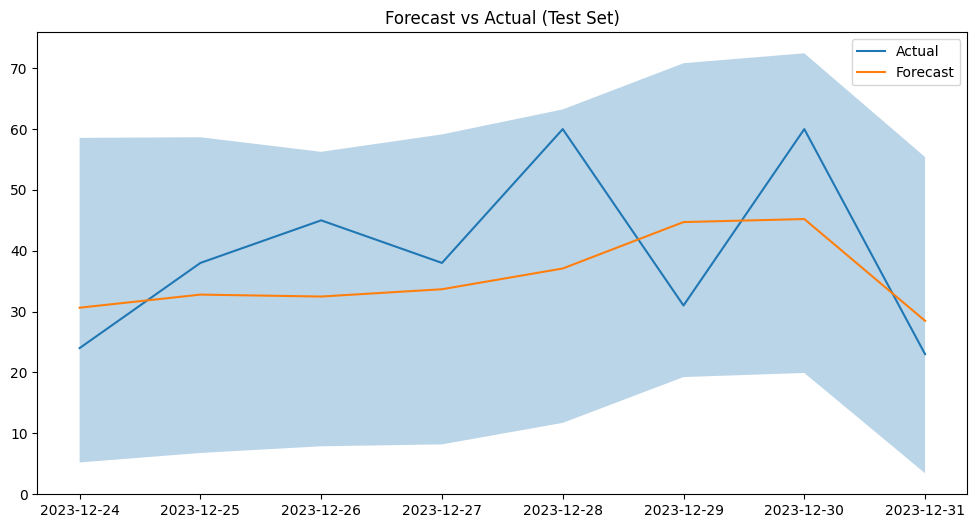

<Figure size 1200x600 with 0 Axes>

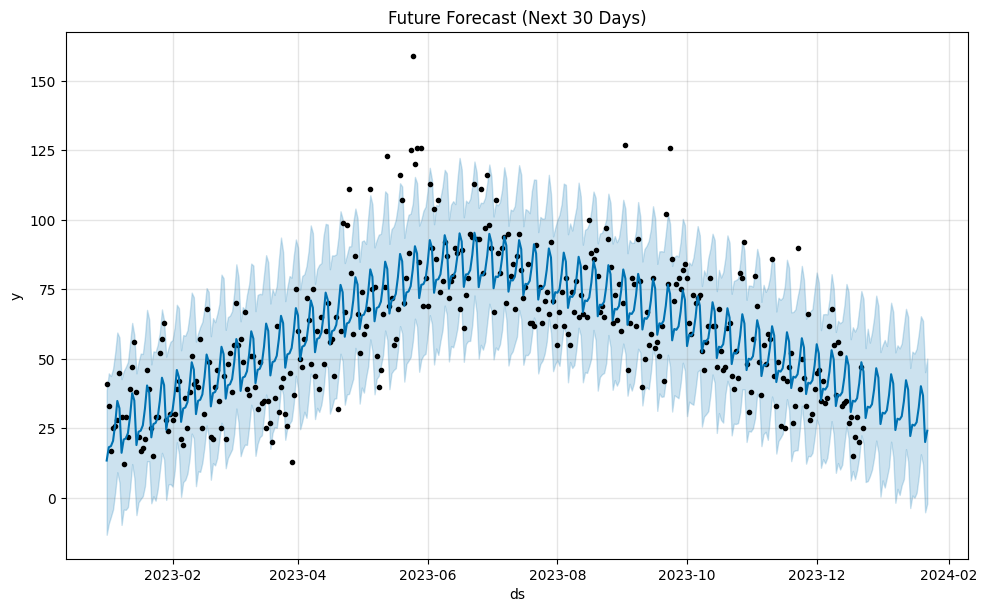

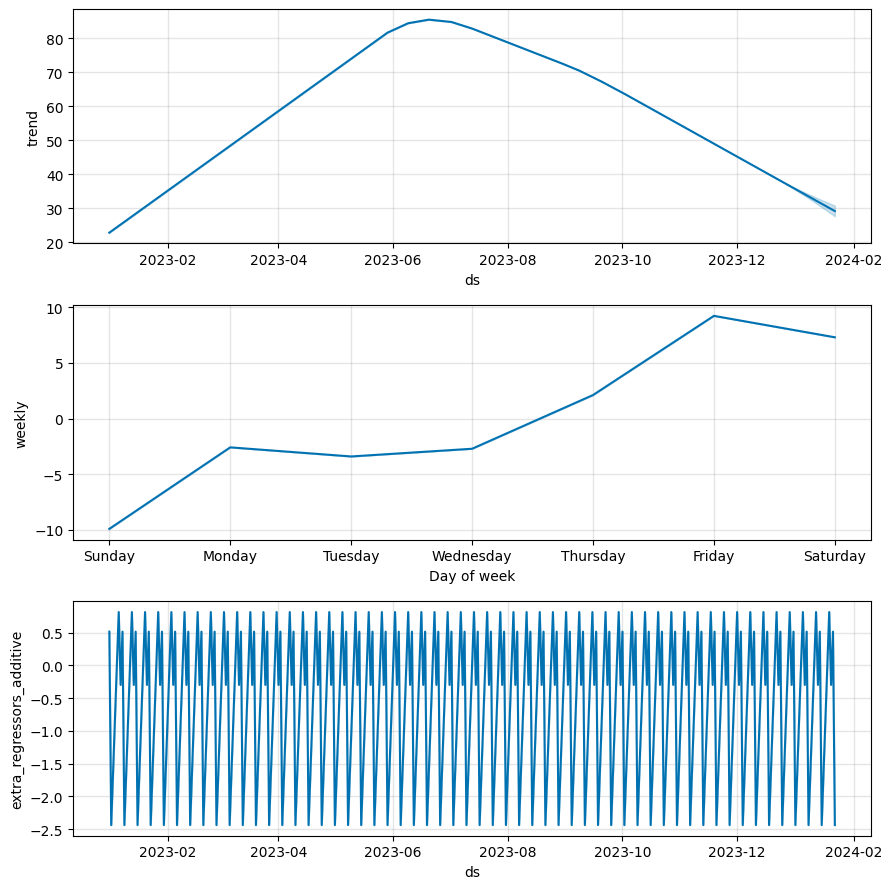

No regressor coefficients found. This might indicate that the regressors were not properly incorporated into the model.


In [35]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming df_IcedTea is your DataFrame
df = df_IcedTea.copy()

# Prepare data for Prophet
df['ds'] = pd.to_datetime(df['Date'])
df['y'] = df['Quantity']

# Define additional regressors with their mode (additive or multiplicative)
regressors = {
    'WeekDay': 'additive',
    'Is_Weekend': 'additive',

}

# Ensure all regressors are present in the dataframe
for regressor in regressors.keys():
    if regressor not in df.columns:
        raise ValueError(f"Regressor '{regressor}' not found in the dataframe.")

# Function to create future dataframe with regressor values
def create_future_with_regressors(model, periods, df):
    future = model.make_future_dataframe(periods=periods)
    
    # Add regressor values for the future period
    for regressor in regressors.keys():
        if regressor == 'WeekDay':
            future['WeekDay'] = future['ds'].dt.dayofweek
        elif regressor == 'Is_Weekend':
            future['Is_Weekend'] = future['ds'].dt.dayofweek.isin([5, 6]).astype(int)
        elif regressor == 'demand':
            # You may want to implement a more sophisticated method to predict future demand
            future['demand'] = df['demand'].mean()
        else:
            # For any other regressors, you can add custom logic here
            future[regressor] = df[regressor].iloc[-1]  # Using the last known value as a placeholder
    
    return future

# Split data into train and test sets
test_start = df['ds'].max() - pd.Timedelta(days=7)
train = df[df['ds'] < test_start]
test = df[df['ds'] >= test_start]

# Fit the Prophet model with regressors
model = Prophet(yearly_seasonality=False, 
                weekly_seasonality=True, 
                daily_seasonality=False,
                n_changepoints=25,
                changepoint_prior_scale=0.05,
                seasonality_prior_scale=10,
                mcmc_samples=0,
                interval_width=0.9)

# Add each regressor to the model with specified mode
for regressor, mode in regressors.items():
    model.add_regressor(regressor, mode=mode)

# Fit the model including regressors
model.fit(train[['ds', 'y'] + list(regressors.keys())])

# Make predictions on the test set, include regressors
test_forecast = model.predict(test[['ds'] + list(regressors.keys())])

# Calculate RMSE on the test set
test_rmse = sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
print(f'\nRMSE on test set: {test_rmse}')

# Plot forecast vs actual for the test set
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Forecast')
plt.fill_between(test_forecast['ds'], test_forecast['yhat_lower'], test_forecast['yhat_upper'], alpha=0.3)
plt.legend()
plt.title('Forecast vs Actual (Test Set)')
plt.show()

# Future predictions (next 30 days)
future = create_future_with_regressors(model, 30, df)

# Make future predictions
future_forecast = model.predict(future)

# Plot future forecast
plt.figure(figsize=(12, 6))
model.plot(future_forecast)
plt.title('Future Forecast (Next 30 Days)')
plt.show()

# Plot components
model.plot_components(future_forecast)
plt.show()

# Feature importance
def get_regressor_coeffs(model):
    coeff_dict = {}
    for name, param in model.params.items():
        if name.startswith('beta_'):
            coeff_dict[name[5:]] = param[0]
    return coeff_dict

regressor_coeffs = get_regressor_coeffs(model)

if not regressor_coeffs:
    print("No regressor coefficients found. This might indicate that the regressors were not properly incorporated into the model.")
else:
    feature_importance = pd.DataFrame({
        'feature': list(regressor_coeffs.keys()),
        'importance': np.abs(list(regressor_coeffs.values())),
        'mode': [regressors.get(feat, 'unknown') for feat in regressor_coeffs.keys()]
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    bars = plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.xticks(rotation=45)

    # Add mode labels to the bars
    for bar, mode in zip(bars, feature_importance['mode']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 mode,
                 ha='center', va='bottom', rotation=0)

    plt.tight_layout()
    plt.show()